# Classify X-rays With Machine Learning project



## About the project

This project is a part of [Codecademy's Build Deep Learning Nodels with Tensorflow skill path.](https://www.codecademy.com/enrolled/paths/build-deep-learning-models-with-tensorflow) In this project I will demostrate building a neural network model, apply classification and model optimisation techniques.

## Project goals

In this project a will take a role of a researcher in a hospital lab and having given the task to develop a learning model that supports doctors with diagnosing illnesses that affect patients’ lungs. At my disposal, I have a set of X-ray lung scans with examples of patients who had either pneumonia, Covid-19, or no illness. Using the Keras module, I will create a classification model that outputs a diagnosis based on a patient’s X-ray scan. This model can help doctors with the challenge of deciphering X-ray scans and open a dialogue between your research team and the medical staff to create learning models that are as effective and interpretable as possible.

## Load data

Import libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from sklearn.metrics import classification_report

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
from tensorflow.keras import layers

In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy

Load data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/Codecademy deep learning/Classify X-rays With Machine Learning

/content/drive/MyDrive/Colab Notebooks/Codecademy deep learning/Classify X-rays With Machine Learning


In [29]:
# Create an ImageDataGenerator object:
DIRECTORY = "Covid19-dataset/train"
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

# Creates an ImageDataGenerator for training data:
training_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    # Randomly increase or decrease the size of the image by up to 20%
    rotation_range=15,
    # Randomly rotate the image between -15,15 degrees
    width_shift_range=0.05,
    # Shift the image along its width by up to +/- 5%
    height_shift_range=0.05
    # Shift the image along its height by up to +/- 5%
)

# Creates an ImageDataGenerator for validation data:
validation_data_generator = ImageDataGenerator()

In [30]:
# Print attributes:
print(training_data_generator.__dict__)

{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 15, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0, 'zoom_range': [0.8, 1.2], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


## Building a model

Create training iterator

In [31]:
# Load training data
training_iterator = training_data_generator.flow_from_directory("Covid19-dataset/train",
                                                                class_mode='categorical',
                                                                color_mode='grayscale',
                                                                target_size=(256,256),
                                                                batch_size=32)

sample_batch_input,sample_batch_labels = training_iterator.next()

print(sample_batch_input.shape,sample_batch_labels.shape)
# There are 251 images in the training dataset, having 3 categories
# We can see that there are 32 images in a batch, and each is a 256x256 pixel grayscale image

Found 251 images belonging to 3 classes.
(32, 256, 256, 1) (32, 3)


Create validation iterator

In [32]:
# Create an ImageDataGenerator that just performs pixel normalization:
validation_data_generator = ImageDataGenerator(rescale=1.0/255)
# Load validation data
validation_iterator = validation_data_generator.flow_from_directory('Covid19-dataset/train',
                                                                    class_mode='categorical',
                                                                    color_mode='grayscale',
                                                                    batch_size=32)

Found 251 images belonging to 3 classes.


Comply a model

In [39]:
# Create a model function
def design_model(training_data):
    model = tf.keras.Sequential()
    # Create Sequential model
    model.add(tf.keras.Input(shape=(256, 256, 1)))
    # Add input layer with greyscale image shape
    model.add(tf.keras.layers.Conv2D(5, 5, strides=3, activation="relu"))
    # Configure first Convolutional Layer with 2 filters each size of 5x5 moving a filter across image 2-pixel a time
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    # Add first Max Pooling layers size 2x2 and a stride of 2
    model.add(layers.Dropout(0.1))
    # Addd a 10% dropout layer
    model.add(tf.keras.layers.Conv2D(3, 3, strides=1, activation="relu"))
    # Configure second Convolutional Layer with 4 filters each size of 3x3 moving a filter across image 1-pixel a time
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    # Add second Max Pooling layers size 2x2 and a stride of 3
    model.add(layers.Dropout(0.2))
    # Add a 20% dropout layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(3,activation="softmax"))
    # Add softmax activation function
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.AUC()],)
    # Compile the model with an Adam optimizer, Categorical Cross Entropy Loss, and Accuracy and AUC metrics:
    model.summary()
    # Print model summary
    return model

In [45]:
# Use model function
model = design_model(training_iterator)


Compiling model...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 84, 84, 5)         130       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 42, 42, 5)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 42, 42, 5)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 3)         138       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 20, 20, 3)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None

In [47]:
# Early stopping
ers = EarlyStopping(monitor='val_auc', mode='min', verbose=1, patience=20)

Train model

In [48]:
# Train and validate model for 5 epochs:
history = model.fit(
    training_iterator,
    steps_per_epoch=training_iterator.samples/BATCH_SIZE,
    epochs=5,
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples/BATCH_SIZE,
    callbacks=[ers])

Epoch 1/5
8/7 [==============================] - ETA: 0s - loss: 1.0987 - categorical_accuracy: 0.3386 - auc_4: 0.4818

7/7 [==============================] - 4s 364ms/step - loss: 1.0987 - categorical_accuracy: 0.3386 - auc_4: 0.4818 - val_loss: 1.0933 - val_categorical_accuracy: 0.5020 - val_auc_4: 0.6284
Epoch 2/5
8/7 [==============================] - ETA: 0s - loss: 1.0901 - categorical_accuracy: 0.5179 - auc_4: 0.6775

7/7 [==============================] - 3s 387ms/step - loss: 1.0901 - categorical_accuracy: 0.5179 - auc_4: 0.6775 - val_loss: 1.0842 - val_categorical_accuracy: 0.5458 - val_auc_4: 0.7162
Epoch 3/5
8/7 [==============================] - ETA: 0s - loss: 1.0801 - categorical_accuracy: 0.6414 - auc_4: 0.7823

7/7 [==============================] - 4s 479ms/step - loss: 1.0801 - categorical_accuracy: 0.6414 - auc_4: 0.7823 - val_loss: 1.0696 - val_categorical_accuracy: 0.5817 - val_auc_4: 0.7883
Epoch 4/5
8/7 [==============================] - ETA: 0s - loss: 1.0649 - categorical_accuracy: 0.5817 - auc_4: 0.7788

7/7 [==============================] - 3s 377ms/step - loss: 1.0649 - categorical_accuracy: 0.5817 - auc_4: 0.7788 - val_loss: 1.0490 - val_categorical_accuracy: 0.5737 - val_auc_4: 0.7952
Epoch 5/5
8/7 [==============================] - ETA: 0s - loss: 1.0464 - categorical_accuracy: 0.6016 - auc_4: 0.7937

7/7 [==============================] - 3s 380ms/step - loss: 1.0464 - categorical_accuracy: 0.6016 - auc_4: 0.7937 - val_loss: 1.0134 - val_categorical_accuracy: 0.7410 - val_auc_4: 0.8861


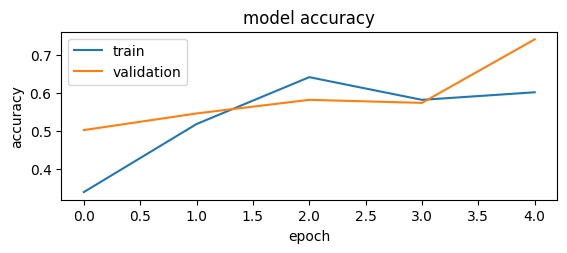

In [51]:
# Plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

plt.show()

## Report a model

In [52]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

8/8 [==============================] - 3s 334ms/step
              precision    recall  f1-score   support

       Covid       0.45      0.26      0.33       111
      Normal       0.25      0.40      0.31        70
   Pneumonia       0.30      0.31      0.31        70

    accuracy                           0.31       251
   macro avg       0.33      0.33      0.31       251
weighted avg       0.35      0.31      0.32       251



In [53]:
# Print confusion matrix
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

[[29 56 26]
 [17 28 25]
 [19 29 22]]
